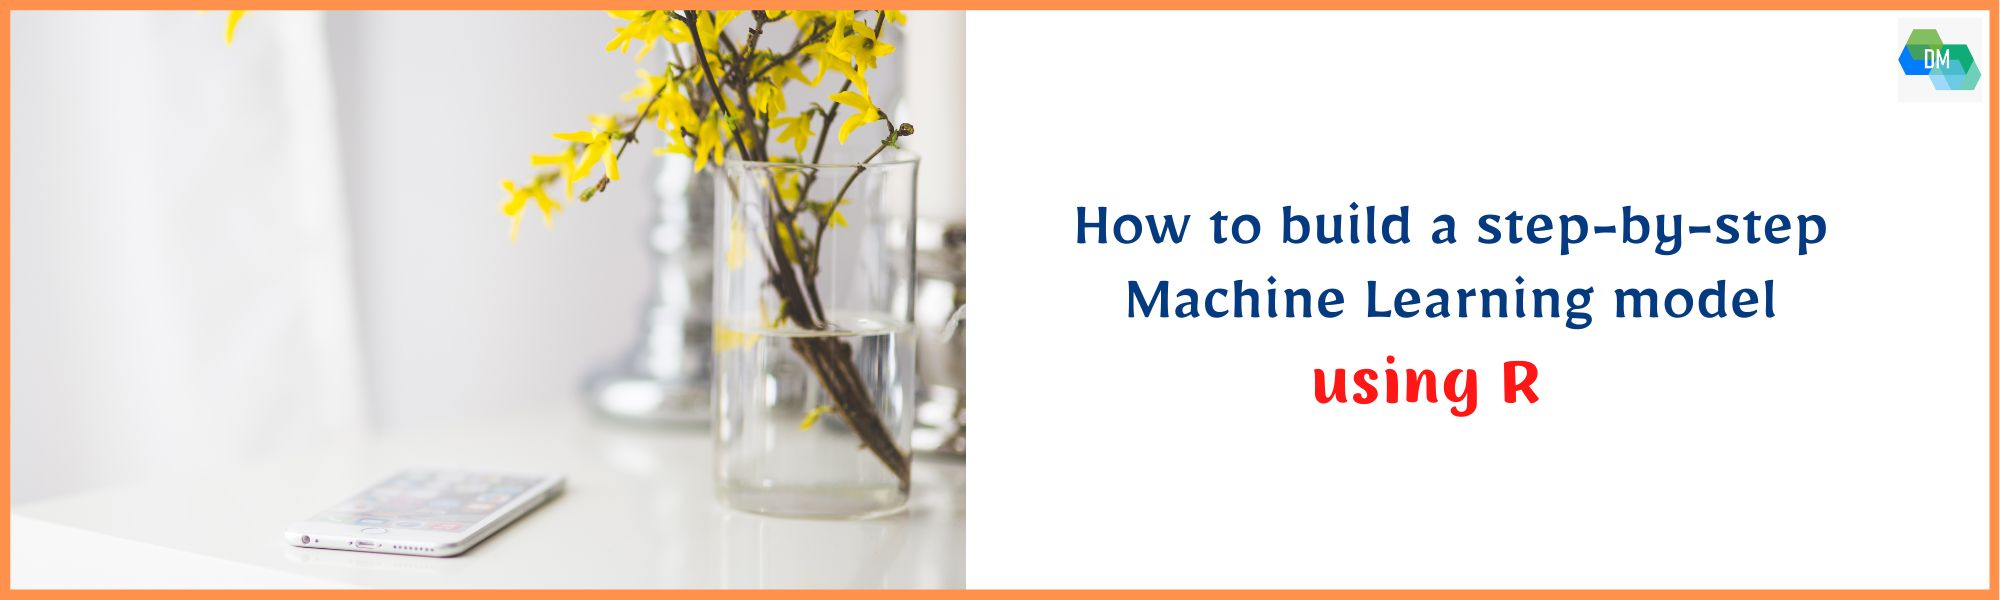

<p style="font-family: Arials; font-size: 20px;text-align: center;; font-style: normal;line-height:1.3">In this article, we will use R to create a machine learning model for classification.</p>

<h3 style="font-family: Arial;background-color:#ffc176;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
library(tidyverse)
library(caret)
library(dplyr)
library(randomForest)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘gridExtra’


The following object is masked from ‘package:randomForest’:

    combine


The following object is masked from ‘package:dplyr’:

    

<h3 style="font-family: Arial;background-color:#ffc176;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing dataset 📝 </centre></strong></h3>

In [2]:
#Read Data
df_stroke<-read.csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [3]:
glimpse(df_stroke)

Rows: 5,110
Columns: 12
$ id                <int> 9046, 51676, 31112, 60182, 1665, 56669, 53882, 10434…
$ gender            <chr> "Male", "Female", "Male", "Female", "Female", "Male"…
$ age               <dbl> 67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 81, 61, 54, …
$ hypertension      <int> 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1…
$ heart_disease     <int> 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0…
$ ever_married      <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No…
$ work_type         <chr> "Private", "Self-employed", "Private", "Private", "S…
$ Residence_type    <chr> "Urban", "Rural", "Rural", "Urban", "Rural", "Urban"…
$ avg_glucose_level <dbl> 228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.0…
$ bmi               <chr> "36.6", "N/A", "32.5", "34.4", "24", "29", "27.4", "…
$ smoking_status    <chr> "formerly smoked", "never smoked", "never smoked", "…
$ stroke            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


In [4]:
summary(df_stroke)

       id           gender               age         hypertension    
 Min.   :   67   Length:5110        Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Class :character   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932   Mode  :character   Median :45.00   Median :0.00000  
 Mean   :36518                      Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                      3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                      Max.   :82.00   Max.   :1.00000  
 heart_disease     ever_married        work_type         Residence_type    
 Min.   :0.00000   Length:5110        Length:5110        Length:5110       
 1st Qu.:0.00000   Class :character   Class :character   Class :character  
 Median :0.00000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.05401                                                           
 3rd Qu.:0.00000                                                           
 Max.   :1.00000                                      

In [5]:
str(df_stroke)

'data.frame':	5110 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : chr  "Male" "Female" "Male" "Female" ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr  "Private" "Self-employed" "Private" "Private" ...
 $ Residence_type   : chr  "Urban" "Rural" "Rural" "Urban" ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : chr  "36.6" "N/A" "32.5" "34.4" ...
 $ smoking_status   : chr  "formerly smoked" "never smoked" "never smoked" "smokes" ...
 $ stroke           : int  1 1 1 1 1 1 1 1 1 1 ...


In [6]:
sapply(df_stroke, class)

id            gender               age      hypertension 
        "integer"       "character"         "numeric"         "integer" 
    heart_disease      ever_married         work_type    Residence_type 
        "integer"       "character"       "character"       "character" 
avg_glucose_level               bmi    smoking_status            stroke 
        "numeric"       "character"       "character"         "integer"

In [7]:
#Before exploring the data, Lets convert the class attributes as needed for our analysis.

df_stroke$stroke<- factor(df_stroke$stroke, levels = c(0,1), labels = c("No", "Yes"))
df_stroke$gender<-as.factor(df_stroke$gender)
df_stroke$hypertension<- factor(df_stroke$hypertension, levels = c(0,1), labels = c("No", "Yes"))
df_stroke$heart_disease<- factor(df_stroke$heart_disease, levels = c(0,1), labels = c("No", "Yes"))
df_stroke$ever_married<-as.factor(df_stroke$ever_married)
df_stroke$work_type<-as.factor(df_stroke$work_type)
df_stroke$Residence_type<-as.factor(df_stroke$Residence_type)
df_stroke$smoking_status<-as.factor(df_stroke$smoking_status)
df_stroke$bmi<-as.numeric(df_stroke$bmi)

summary(df_stroke)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


       id           gender          age        hypertension heart_disease
 Min.   :   67   Female:2994   Min.   : 0.08   No :4612     No :4834     
 1st Qu.:17741   Male  :2115   1st Qu.:25.00   Yes: 498     Yes: 276     
 Median :36932   Other :   1   Median :45.00                             
 Mean   :36518                 Mean   :43.23                             
 3rd Qu.:54682                 3rd Qu.:61.00                             
 Max.   :72940                 Max.   :82.00                             
                                                                         
 ever_married         work_type    Residence_type avg_glucose_level
 No :1757     children     : 687   Rural:2514     Min.   : 55.12   
 Yes:3353     Govt_job     : 657   Urban:2596     1st Qu.: 77.25   
              Never_worked :  22                  Median : 91.89   
              Private      :2925                  Mean   :106.15   
              Self-employed: 819                  3rd Qu.:114.09   


In [8]:
#check missing values
sum(is.na(df_stroke))

[1] 201

In [9]:
# Drop the column with 'other'.(Since there is only 1 row)
df_stroke = df_stroke[!df_stroke$gender == 'Other',]

In [10]:
#imputing dataset
df_stroke$bmi[is.na(df_stroke$bmi)]<- mean(df_stroke$bmi,na.rm = TRUE)

#check missing values
sum(is.na(df_stroke))

[1] 0

<h3 style="font-family: Arial;background-color:#ffc176;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>EDA 📊 </centre></strong></h3>

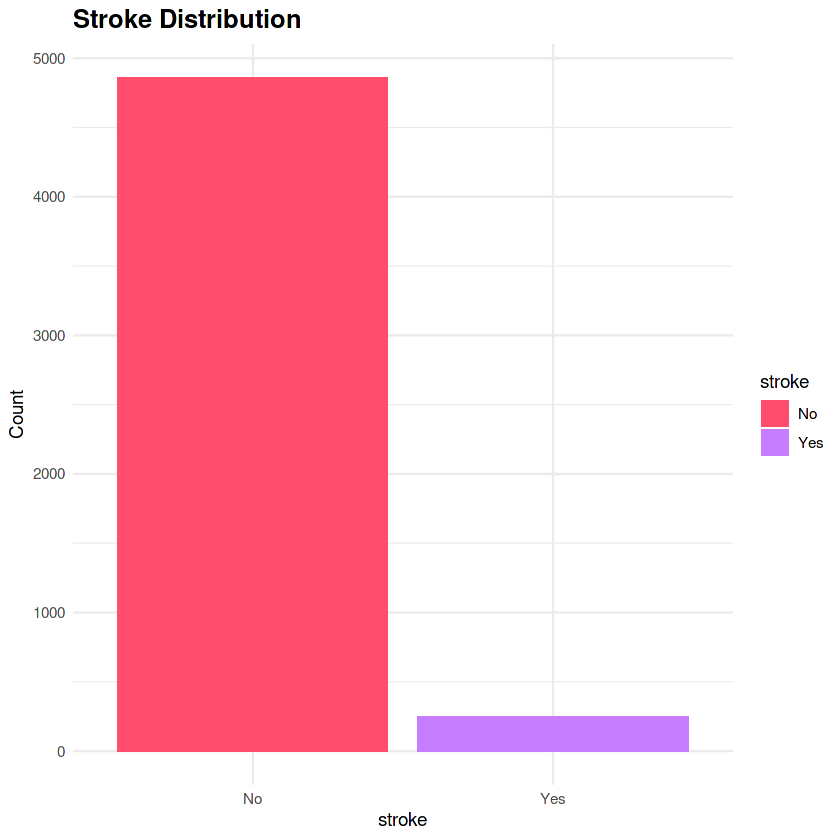

In [11]:
Stroke_plt <- df_stroke %>%
              ggplot() +
              geom_bar(aes(x = stroke, fill = stroke), position = "dodge") + 
              scale_fill_manual(values = c("#ff4d6d", "#c77dff"))+
              theme_minimal() + 
              theme(plot.title = element_text(size = 15, face = "bold")) +
              labs(y = "Count", title = "Stroke Distribution")

Stroke_plt

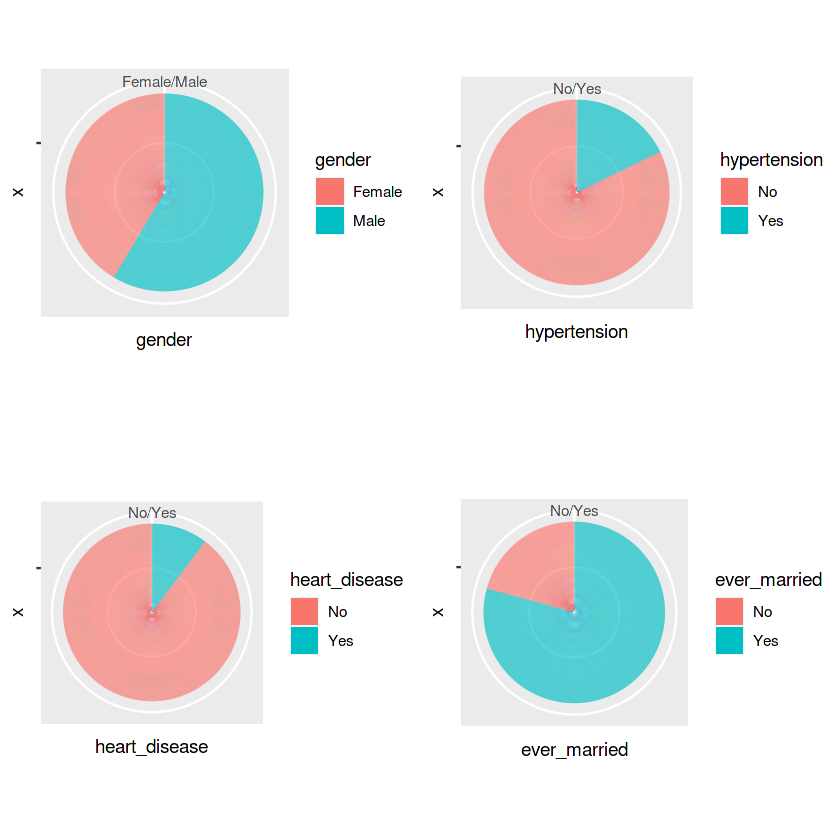

In [12]:
p1 <- ggplot(df_stroke, aes(x="", y=gender, fill=gender)) + geom_bar(stat="identity", width=1)  + coord_polar("y", start=0)
p2 <-ggplot(df_stroke, aes(x="", y=hypertension, fill=hypertension)) + geom_bar(stat="identity", width=1)  + coord_polar("y", start=0)
p3 <-ggplot(df_stroke, aes(x="", y=heart_disease, fill=heart_disease)) + geom_bar(stat="identity", width=1)  + coord_polar("y", start=0)
p4 <-ggplot(df_stroke, aes(x="", y=ever_married, fill=ever_married)) + geom_bar(stat="identity", width=1)  + coord_polar("y", start=0) 
grid.arrange(p1,p2,p3,p4 ,ncol= 2)

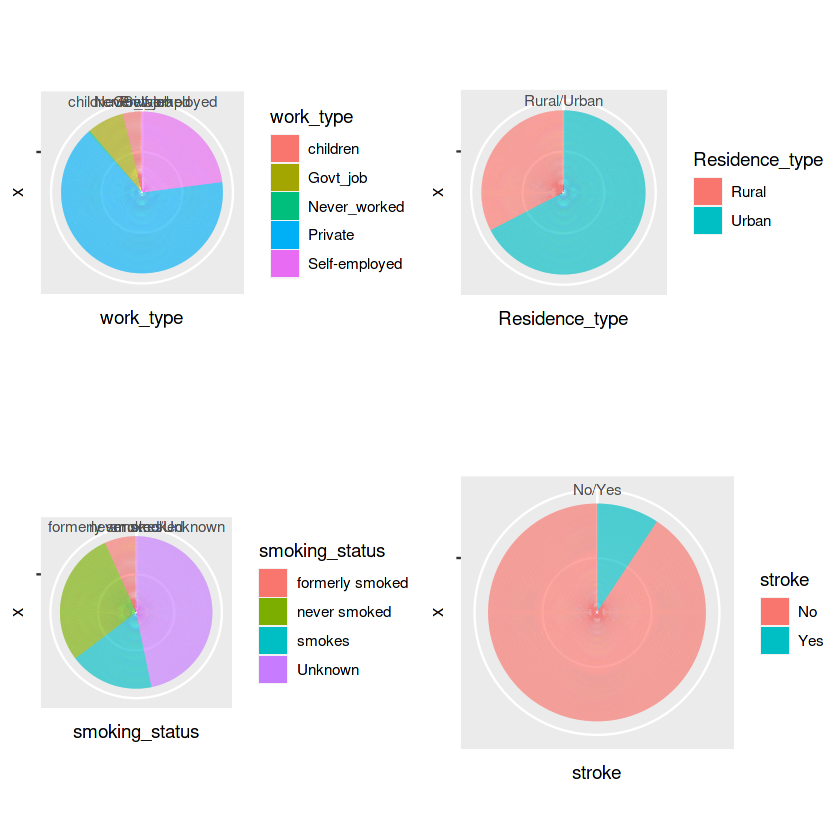

In [13]:
p5 <- ggplot(df_stroke, aes(x="", y=work_type, fill=work_type)) + geom_bar(stat="identity", width=1)  + coord_polar("y", start=0)
p6 <- ggplot(df_stroke, aes(x="", y=Residence_type, fill=Residence_type)) + geom_bar(stat="identity", width=1)  + coord_polar("y", start=0)
p7 <- ggplot(df_stroke, aes(x="", y=smoking_status, fill=smoking_status)) + geom_bar(stat="identity", width=1)  + coord_polar("y", start=0)
p8 <- ggplot(df_stroke, aes(x="", y=stroke, fill=stroke)) + geom_bar(stat="identity", width=1)  + coord_polar("y", start=0) 
grid.arrange(p5,p6,p7,p8 ,ncol= 2)

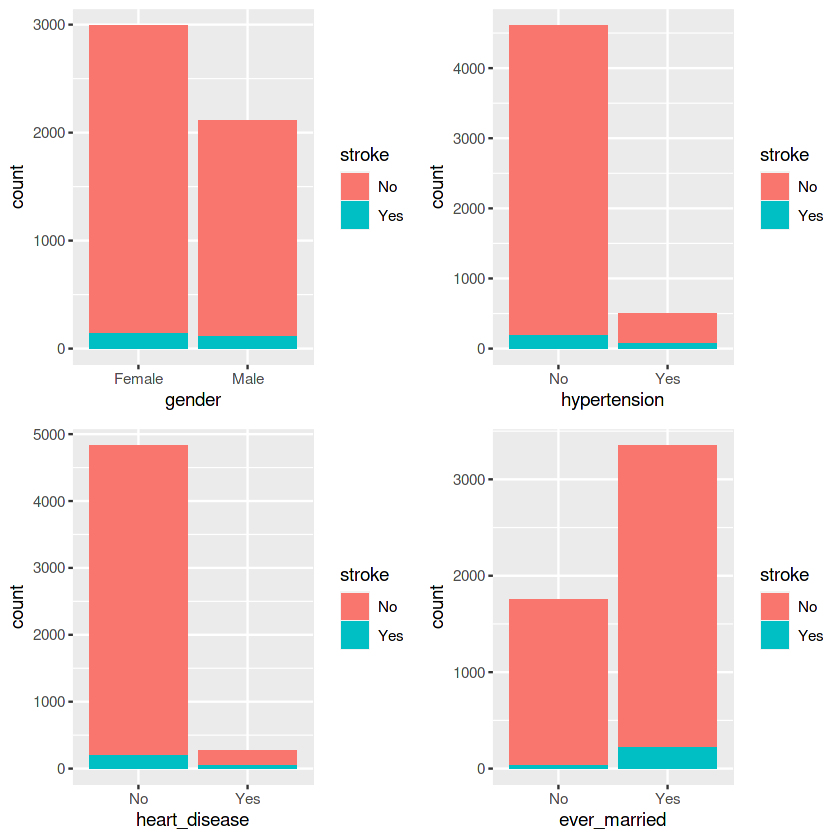

In [14]:
p1 <- ggplot(data = df_stroke) +geom_bar(mapping = aes(x = gender,fill=stroke))
p2 <-ggplot(data = df_stroke) +geom_bar(mapping = aes(x = hypertension,fill=stroke))
p3 <-ggplot(data = df_stroke) +geom_bar(mapping = aes(x = heart_disease,fill=stroke)) 
p4 <-ggplot(data = df_stroke) +geom_bar(mapping = aes(x = ever_married,fill=stroke)) 
grid.arrange(p1,p2,p3,p4 ,ncol= 2)

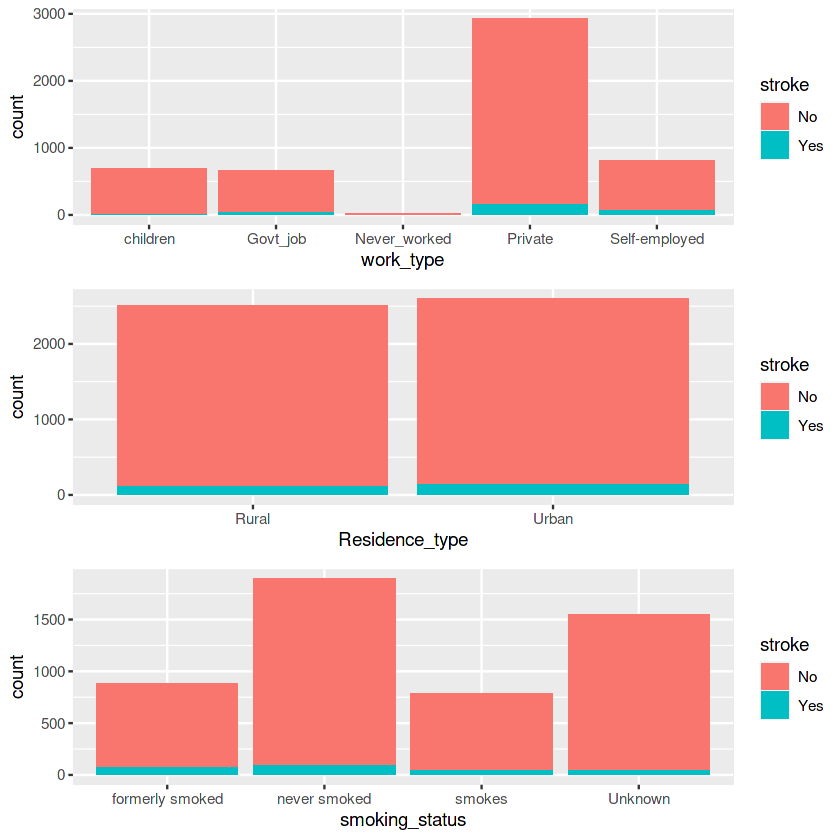

In [15]:
p5 <- ggplot(data = df_stroke) +geom_bar(mapping = aes(x = work_type,fill=stroke))
p6 <-ggplot(data = df_stroke) +geom_bar(mapping = aes(x = Residence_type,fill=stroke))
p7 <-ggplot(data = df_stroke) +geom_bar(mapping = aes(x = smoking_status,fill=stroke)) 
grid.arrange(p5,p6,p7 ,ncol= 1)

<h3 style="font-family: Arial;background-color:#ffc176;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Machine Learning </centre></strong></h3>

In [16]:
#Lets split the final dataset to training and test data.
n_obs <- nrow(df_stroke)
split <- round(n_obs * 0.7)
train <- df_stroke[1:split,]
# Create test
test <- df_stroke[(split + 1):nrow(df_stroke),]

In [17]:
dim(train)
dim(test)

[1] 3576   12

[1] 1533   12

In [18]:
#Modeling
set.seed(123)
rf_model<-randomForest(formula= stroke~.,data = train,metric='Accuracy')
rf_model


Call:
 randomForest(formula = stroke ~ ., data = train, metric = "Accuracy") 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 7.13%
Confusion matrix:
      No Yes class.error
No  3319   8 0.002404569
Yes  247   2 0.991967871

In [19]:
confusionMatrix(predict(rf_model, test), test$stroke)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1532    0
       Yes    1    0
                                     
               Accuracy : 0.9993     
                 95% CI : (0.9964, 1)
    No Information Rate : 1          
    P-Value [Acc > NIR] : 1          
                                     
                  Kappa : 0          
                                     
 Mcnemar's Test P-Value : 1          
                                     
            Sensitivity : 0.9993     
            Specificity :     NA     
         Pos Pred Value :     NA     
         Neg Pred Value :     NA     
             Prevalence : 1.0000     
         Detection Rate : 0.9993     
   Detection Prevalence : 0.9993     
      Balanced Accuracy :     NA     
                                     
       'Positive' Class : No         
                                     

📌 Details of the model setup are discussed in my article https://www.analyticsvidhya.com/blog/2022/06/build-a-step-by-step-machine-learning-model-using-r/ published on AnalyticsVidhya.


<h3 style="font-family: Arial;background-color:#ffc176;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>If you found this notebook useful, please Upvote. Thanks!  </centre></strong></h3>